<img src="../Img/banner-fa-49-2.png">
<p>5 октября 2021 года, ВМ/451 (ул. Верхняя Масловка, д. 15)</p>

# Тема 5. Анализ временных рядов

Студенты: Поток:УЦИ20-1<br>
Преподаватель: Смирнов Михаил Викторович, доцент Департамента Анализа данных и машинного обучения Финансового университета при Правительстве Российской Федерации

Задание. Имеется файл с информацией об изменении цены акции Apple за период времени. Построить график динамики и линию тренда по значению цены закрытия. Построить гистограмму. В процессе выполнения задания необходимо преобразовать данные к типу даты и числа, где это необходимо.

Файл с данными: *HistoricPricesappleBAE.csv* находится в папке *Data*. Источник: https://www.finanz.ru

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline

Создадим таблицу - объект *DataFrame*

In [4]:
df = pd.read_csv('Data/US1.AAPL_210601_210930.csv', sep=';')
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,US1.AAPL,D,01/06/21,0,125.08,125.35,123.94,124.30,2708254
1,US1.AAPL,D,02/06/21,0,124.29,125.23,124.05,125.09,2569184
2,US1.AAPL,D,03/06/21,0,124.63,124.85,123.14,123.55,3187672
3,US1.AAPL,D,04/06/21,0,124.07,126.15,123.86,125.86,3235599
4,US1.AAPL,D,07/06/21,0,126.18,126.31,124.84,125.94,3106377
...,...,...,...,...,...,...,...,...,...
82,US1.AAPL,D,27/09/21,0,145.40,145.96,143.83,145.39,3504880
83,US1.AAPL,D,28/09/21,0,143.19,144.75,141.70,141.95,5602142
84,US1.AAPL,D,29/09/21,0,142.47,144.45,142.03,142.86,3205269
85,US1.AAPL,D,30/09/21,0,143.67,144.37,141.29,141.36,4102531


Для получения краткой информации о *df* используем метод **_info()_**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  87 non-null     object 
 1   <PER>     87 non-null     object 
 2   <DATE>    87 non-null     object 
 3   <TIME>    87 non-null     int64  
 4   <OPEN>    87 non-null     float64
 5   <HIGH>    87 non-null     float64
 6   <LOW>     87 non-null     float64
 7   <CLOSE>   87 non-null     float64
 8   <VOL>     87 non-null     int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 6.2+ KB


Столбец *<Date>* имеет тип 'object'. Проведем преобразование типов.

In [8]:
#df['<CLOSE>'] = df['<CLOSE>'].str.replace(',', '.')
#df['<CLOSE>'] = pd.to_numeric(df['<CLOSE>'])
df['<DATE>'] = pd.to_datetime(df['<DATE>'], dayfirst=True)

In [10]:
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,US1.AAPL,D,2021-06-01,0,125.08,125.35,123.94,124.30,2708254
1,US1.AAPL,D,2021-06-02,0,124.29,125.23,124.05,125.09,2569184
2,US1.AAPL,D,2021-06-03,0,124.63,124.85,123.14,123.55,3187672
3,US1.AAPL,D,2021-06-04,0,124.07,126.15,123.86,125.86,3235599
4,US1.AAPL,D,2021-06-07,0,126.18,126.31,124.84,125.94,3106377


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   <TICKER>  87 non-null     object        
 1   <PER>     87 non-null     object        
 2   <DATE>    87 non-null     datetime64[ns]
 3   <TIME>    87 non-null     int64         
 4   <OPEN>    87 non-null     float64       
 5   <HIGH>    87 non-null     float64       
 6   <LOW>     87 non-null     float64       
 7   <CLOSE>   87 non-null     float64       
 8   <VOL>     87 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 6.2+ KB


Теперь *`<DATE>`* - это дата

Отсортируем по дате

In [13]:
df.sort_values(by='<DATE>', inplace=True)
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,US1.AAPL,D,2021-06-01,0,125.08,125.35,123.94,124.30,2708254
1,US1.AAPL,D,2021-06-02,0,124.29,125.23,124.05,125.09,2569184
2,US1.AAPL,D,2021-06-03,0,124.63,124.85,123.14,123.55,3187672
3,US1.AAPL,D,2021-06-04,0,124.07,126.15,123.86,125.86,3235599
4,US1.AAPL,D,2021-06-07,0,126.18,126.31,124.84,125.94,3106377


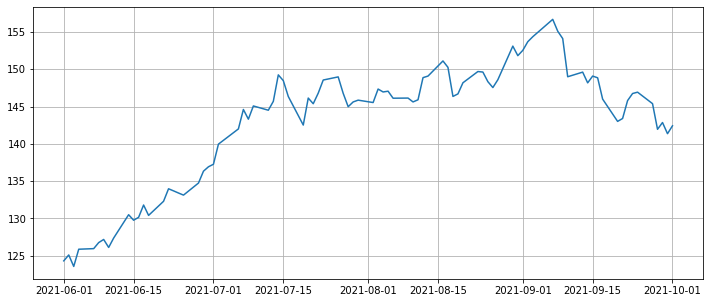

In [14]:
plt.figure(figsize=(12, 5))
x = df['<DATE>']
y = df['<CLOSE>']
plt.plot(x, y)
plt.grid();

Построим линию тренда

$$ y = a + b \cdot x $$

Найдем параметры линии тренда

$$
b=\frac{cov(x,y)}{Disp_x}
$$

$$
a=E(y)- b \cdot E(x)
$$

Создадим столбец с номером измерения, значения которого начинаются от 1

In [17]:
df['No'] = pd.Series(np.arange(1, len(df)+1))
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,No
0,US1.AAPL,D,2021-06-01,0,125.08,125.35,123.94,124.30,2708254,1
1,US1.AAPL,D,2021-06-02,0,124.29,125.23,124.05,125.09,2569184,2
2,US1.AAPL,D,2021-06-03,0,124.63,124.85,123.14,123.55,3187672,3
3,US1.AAPL,D,2021-06-04,0,124.07,126.15,123.86,125.86,3235599,4
4,US1.AAPL,D,2021-06-07,0,126.18,126.31,124.84,125.94,3106377,5


Найдем ковариационную матрицу показателей `<CLOSE>` и `No`

In [18]:
cov_matrix = np.cov(df['<CLOSE>'], df['No'])
cov_matrix

array([[ 70.48023128, 162.85069767],
       [162.85069767, 638.        ]])

In [20]:
cov_xy=cov_matrix[0,1]
print(cov_xy)

162.85069767441865


In [21]:
disp_x = df['No'].std()**2
disp_x

638.0000000000001

In [22]:
b = cov_xy / disp_x
a = df['<CLOSE>'].mean() - b*df['No'].mean()
print(a, b)

131.57926222935052 0.2552518772326311


In [23]:
df['Trend'] = a + b*df['No']
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,No,Trend
0,US1.AAPL,D,2021-06-01,0,125.08,125.35,123.94,124.30,2708254,1,131.834514
1,US1.AAPL,D,2021-06-02,0,124.29,125.23,124.05,125.09,2569184,2,132.089766
2,US1.AAPL,D,2021-06-03,0,124.63,124.85,123.14,123.55,3187672,3,132.345018
3,US1.AAPL,D,2021-06-04,0,124.07,126.15,123.86,125.86,3235599,4,132.600270
4,US1.AAPL,D,2021-06-07,0,126.18,126.31,124.84,125.94,3106377,5,132.855522


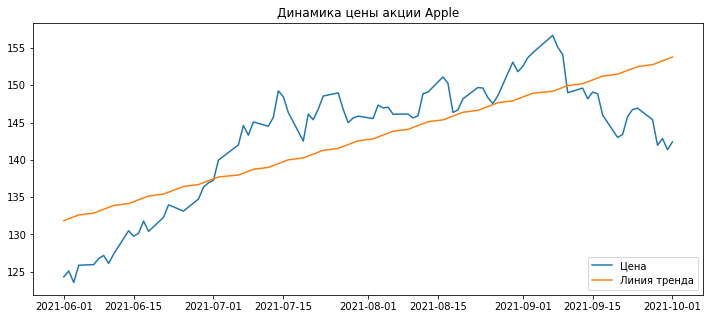

In [30]:
plt.figure(figsize=(12, 5))
plt.title('Динамика цены акции Apple', loc='center')
x = df['<DATE>']
y = df['<CLOSE>']
plt.plot(x, y, label = 'Цена')
plt.plot(x, df['Trend'], label='Линия тренда')
plt.legend(loc='lower right');

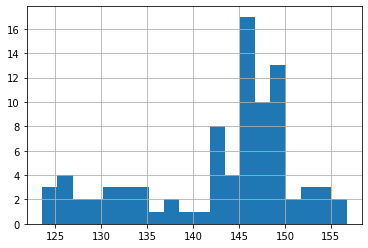

In [31]:
df['<CLOSE>'].hist(bins=20)

### Экспоненциальное сглаживание

In [33]:
alfa = 0.1 # Начальное значение коэффициента сглаживания
while alfa < 1: # выполняется цикл до тех пор, пока alfa меньше единицы
  ExpColumnName = 'Exp0' + str(alfa)[2] # Формируем имя столбца сглаженных значений: Exp01, Exp02 и т. д. до Exp09
  L = [] # Список, в который будем помещать сглаженные значения, сейчас он пуст
  for i in range(len(df)): # создаем цикл от нуля до числа, равного числу строк в таблице минус один
    if i == 0: # первый день
      L.append(np.NaN) # добавляем в список пустое значение, так как сглаженного значения в первый день нет
    elif i == 1: # второй день
      L.append(df['<CLOSE>'][0]) # добавляем в список значение цены в первый день (строка с индексом [0])
    else: # все последующие дни
      L.append(alfa * df['<CLOSE>'][i-1] + (1-alfa) * L[i-1]) # добавляем в список сглаженное значение, сформированное из предыдущего значения цены и предыдущего значения списка
  df[ExpColumnName] = pd.Series(L) # добавляем в датафрейм столбец, содержащий элементы сформированного списка сглаженных значений
  alfa += 0.1 # приращение коэффициента сглаживания

In [34]:
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,No,Trend,Exp01,Exp02,Exp03,Exp04,Exp05,Exp06,Exp07,Exp08,Exp09
0,US1.AAPL,D,2021-06-01,0,125.08,125.35,123.94,124.30,2708254,1,131.834514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1.AAPL,D,2021-06-02,0,124.29,125.23,124.05,125.09,2569184,2,132.089766,124.300000,124.300000,124.300000,124.300000,124.300000,124.300000,124.300000,124.300000,124.30
2,US1.AAPL,D,2021-06-03,0,124.63,124.85,123.14,123.55,3187672,3,132.345018,124.379000,124.458000,124.537000,124.616000,124.695000,124.774000,124.932000,125.011000,125.09
3,US1.AAPL,D,2021-06-04,0,124.07,126.15,123.86,125.86,3235599,4,132.600270,124.296100,124.276400,124.240900,124.189600,124.122500,124.039600,123.826400,123.696100,123.55
4,US1.AAPL,D,2021-06-07,0,126.18,126.31,124.84,125.94,3106377,5,132.855522,124.452490,124.593120,124.726630,124.857760,124.991250,125.131840,125.453280,125.643610,125.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,US1.AAPL,D,2021-09-27,0,145.40,145.96,143.83,145.39,3504880,83,152.765168,148.086731,146.916169,146.370332,146.298973,146.419445,146.585075,146.837317,146.900094,146.93
83,US1.AAPL,D,2021-09-28,0,143.19,144.75,141.70,141.95,5602142,84,153.020420,147.817058,146.610935,146.076233,145.935384,145.904723,145.868030,145.679463,145.541009,145.39
84,US1.AAPL,D,2021-09-29,0,142.47,144.45,142.03,142.86,3205269,85,153.275672,147.230352,145.678748,144.838363,144.341230,143.927361,143.517212,142.695893,142.309101,141.95
85,US1.AAPL,D,2021-09-30,0,143.67,144.37,141.29,141.36,4102531,86,153.530924,146.793317,145.114998,144.244854,143.748738,143.393681,143.122885,142.827179,142.804910,142.86


Построим график

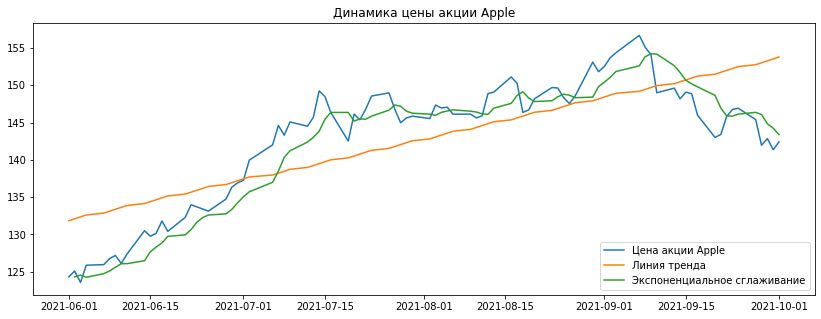

In [37]:
plt.figure(figsize=(14, 5))
plt.title('Динамика цены акции Apple', loc='center')
x = df['<DATE>']
y = df['<CLOSE>']
yt = df['Trend']
ye = df['Exp03']
plt.plot(x, y, label = 'Цена акции Apple')
plt.plot(x, yt, label = 'Линия тренда')
plt.plot(x, ye, label = 'Экспоненциальное сглаживание')
plt.legend(loc='lower right');

Второй способ, с помощью функции

In [38]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

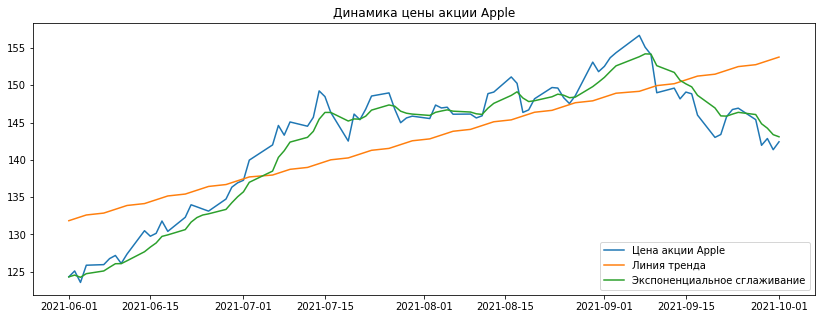

In [42]:
plt.figure(figsize=(14, 5))
plt.title('Динамика цены акции Apple', loc='center')
x = df['<DATE>']
y = df['<CLOSE>']
yt = df['Trend']
ye = exponential_smoothing(df['<CLOSE>'], 0.3)
plt.plot(x, y, label = 'Цена акции Apple')
plt.plot(x, yt, label = 'Линия тренда')
plt.plot(x, ye, label = 'Экспоненциальное сглаживание')
plt.legend(loc='lower right');

### Скользящее среднее

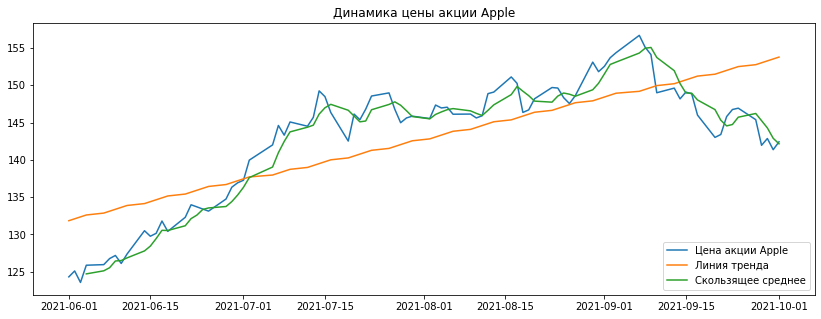

In [44]:
plt.figure(figsize=(14, 5))
plt.title('Динамика цены акции Apple', loc='center')
x = df['<DATE>']
y = df['<CLOSE>']
yt = df['Trend']
ye = df['<CLOSE>'].rolling(4).mean()
plt.plot(x, y, label = 'Цена акции Apple')
plt.plot(x, yt, label = 'Линия тренда')
plt.plot(x, ye, label = 'Скользящее среднее')
plt.legend(loc='lower right');

Рассчитаем $R^2$

In [77]:
n=len(df)
disp_y=df["<CLOSE>"].std()**2

disp_epsilon = np.sum((y - yt)**2/n)
print("Дисперсия цены", round(disp_y,3))
print("Дисперсия остатков модели", round(disp_epsilon,3))

R2 = (disp_y - disp_epsilon) / disp_y
print("R^2 =", round(R2,3))

Дисперсия цены 70.48
Дисперсия остатков модели 28.58
R^2 = 0.594


## Нелинейная модель

Построим модель вида
$$
\widehat{y}=a+b\cdot{x}+c\cdot{x^2}
$$

Найдем вектор параметров $w = (a, b, c)$, применив метод наименьших квадратов. 

$$
\widehat{y} = \sum_{i=0}^I w_i x_{i} = X{w}^T
$$

Решив уравнение в матричном виде, получим соотношение

$$ w=({X}^{T} {X})^{-1} {X}^{T}{y} $$

где $X$ - матрица признаков, $y$ - вектор значений цены акции.

Вектор $y$ известен и содержится в исходных данных. Сформируем матрицу $X$.

In [59]:
x0=np.ones(len(df))
x1=np.arange(1,len(df)+1)
x2 = x1**2
X=np.stack((x0,x1,x2),axis=1)
print(X[:5])

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]


In [60]:
x2

array([   1,    4,    9,   16,   25,   36,   49,   64,   81,  100,  121,
        144,  169,  196,  225,  256,  289,  324,  361,  400,  441,  484,
        529,  576,  625,  676,  729,  784,  841,  900,  961, 1024, 1089,
       1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936,
       2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025,
       3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356,
       4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929,
       6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569],
      dtype=int32)

In [61]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print(w)

[ 1.20630276e+02  9.93385783e-01 -8.38788530e-03]


In [62]:
y_model = w[0]*X[:,0] + w[1]*X[:,1] + w[2]*X[:,2]

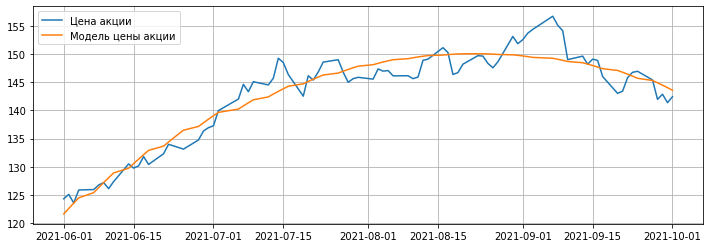

In [71]:
plt.figure(figsize=(12,4))
plt.plot(x, y, label="Цена акции")
plt.plot(x, y_model, label="Модель цены акции")
plt.grid()
#plt.xticks(ticks=np.arange(0,len(df),10), 
#           labels=df["<DATE>"].apply(lambda x: dt.strftime(x,"%Y-%m-%d"))[::10])
plt.legend();

Рассчитаем $R^2$ нелинейной модели

In [78]:
n=len(df)
disp_y=df["<CLOSE>"].std()**2

disp_epsilon = np.sum((y - y_model)**2/n)
print("Дисперсия цены", round(disp_y,3))
print("Дисперсия остатков модели", round(disp_epsilon,3))

R2 = (disp_y - disp_epsilon) / disp_y
print("R^2 =", round(R2,3))

Дисперсия цены 70.48
Дисперсия остатков модели 6.202
R^2 = 0.912
